# LAB #2: Probability, Distributions, and Statistical Questions
By: Evelena Burunova

In [341]:
%matplotlib inline
import scipy
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

plt.rcParams["figure.figsize"] = (15,10)

### Problem 1 
<br>
Convolution can be used to calculate probability of a sum or average. Here, we will "explore" and look for gamma-ray sources via a Fermi telescope. This telescope provides a discrete noise term that follows the poisson distribution. In order to detect the gamma-ray source, we need to ask what is the probability that the cosmic-ray background would have given you a measurement as signal-like or more than the signal that you received.<br>
<br>
Assume in a single day the average cosmic-ray background is some value X, here, we choose X=3. Additionally, the average number of gamma-rays emitted by our "source" is Y, here, Y=6.<br>
<br>
a). We will first want to show the probability distribution of the background changes as we integrate (sum) for more than just a single day. Here, we will create a poisson distribution and then convolve it for 3 and 4 days. <br>
<br>

In [357]:
avgCosmicRays = 3 #x
avgGammaRays = 6 #y
distance = stats.poisson(avgCosmicRays)
x = np.arange(0,12)
p = distance.pmf(x)

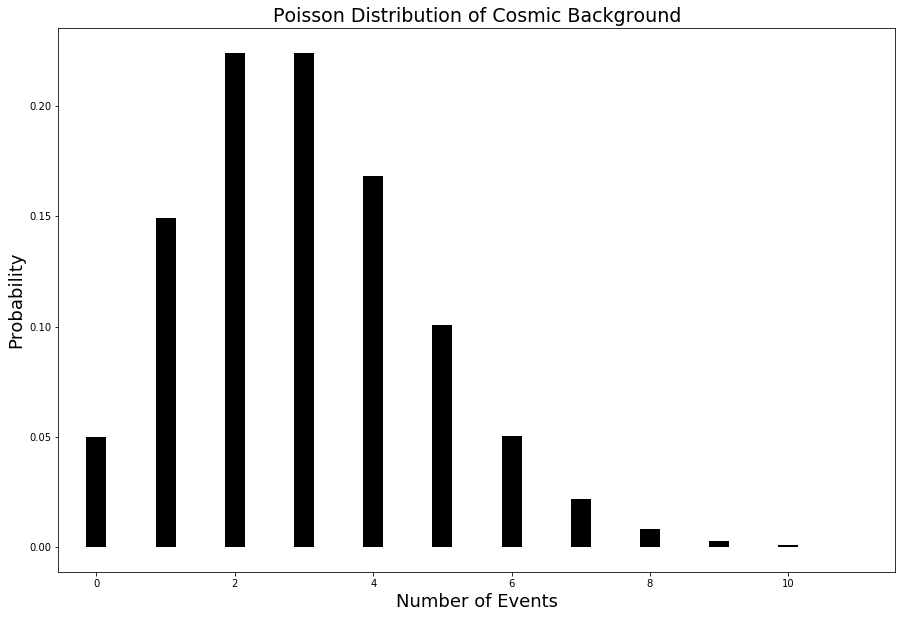

In [360]:
fig, ax = plt.subplots(1, 1)
ax.vlines(x, 0, p, linewidth = 20) 
plt.title("Poisson Distribution of Cosmic Background", size = 19)
plt.xlabel("Number of Events", size= 18)
plt.ylabel("Probability", size=18)
plt.show()

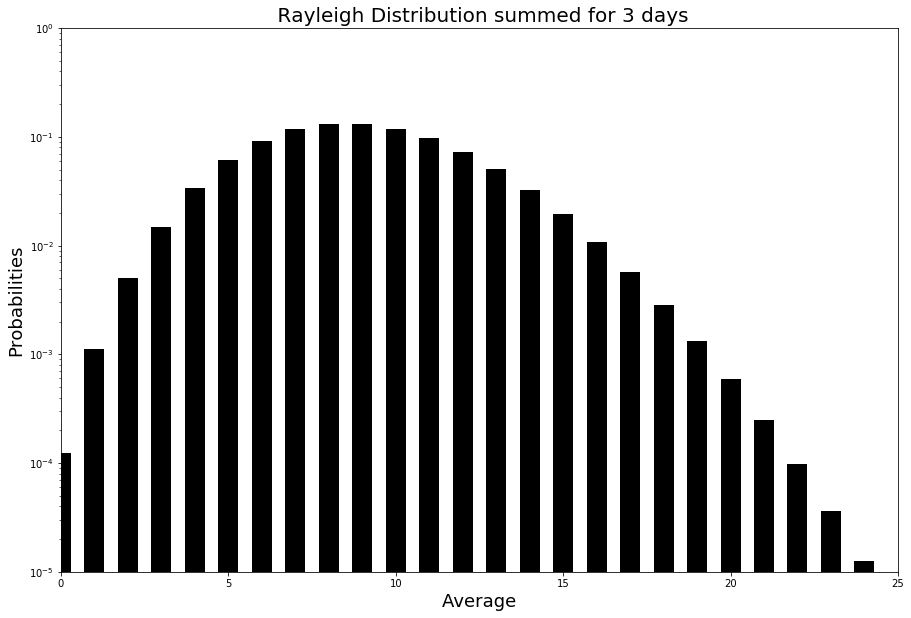

In [366]:
#A
n = 3 #days
sums = p
for i in range(n-1):
    sums  = scipy.signal.fftconvolve(sums, p)
    
plt.vlines(range(len(sums)), 0, sums, linewidth=20)
plt.xlim([0,25])
plt.ylim(1e-5, 1)
plt.yscale('log')
plt.xlabel("Average", size = 18)
plt.ylabel("Probabilities", size=18)
plt.title(" Rayleigh Distribution summed for 3 days", size =20)
plt.show()

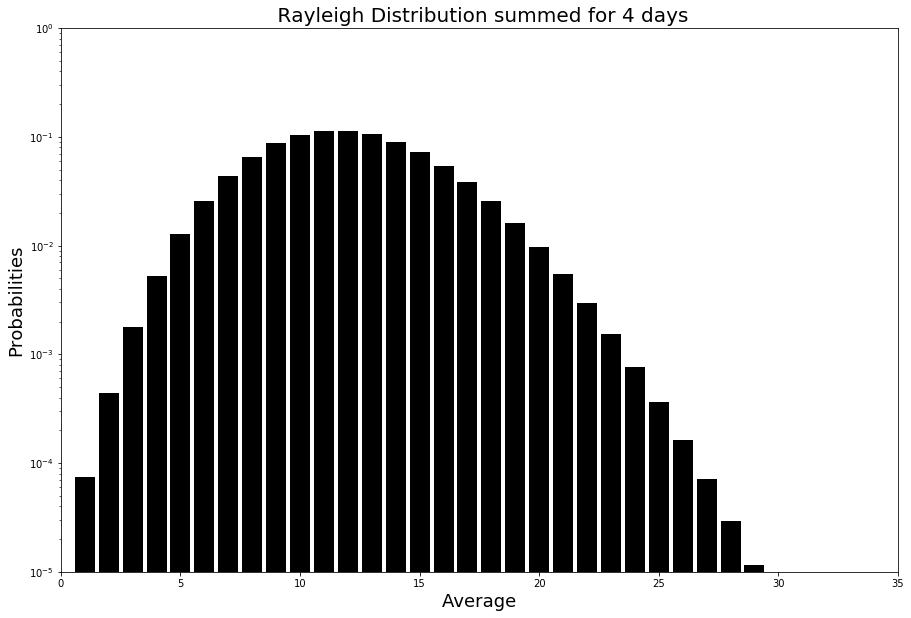

In [365]:
n = 4 #days
sums = p
for i in range(n-1):
    sums  = scipy.signal.fftconvolve(sums, p)
    
plt.vlines(range(len(sums)), 0, sums, linewidth=20)
plt.xlim([0,35])
plt.ylim(1e-5, 1)
plt.yscale('log')
plt.xlabel("Average", size = 18)
plt.ylabel("Probabilities", size=18)
plt.title(" Rayleigh Distribution summed for 4 days", size =20)
plt.show()

b). Then we would like to convolve >5 days. Here, we will plot semi-log scale to show poisson distribution. <br>

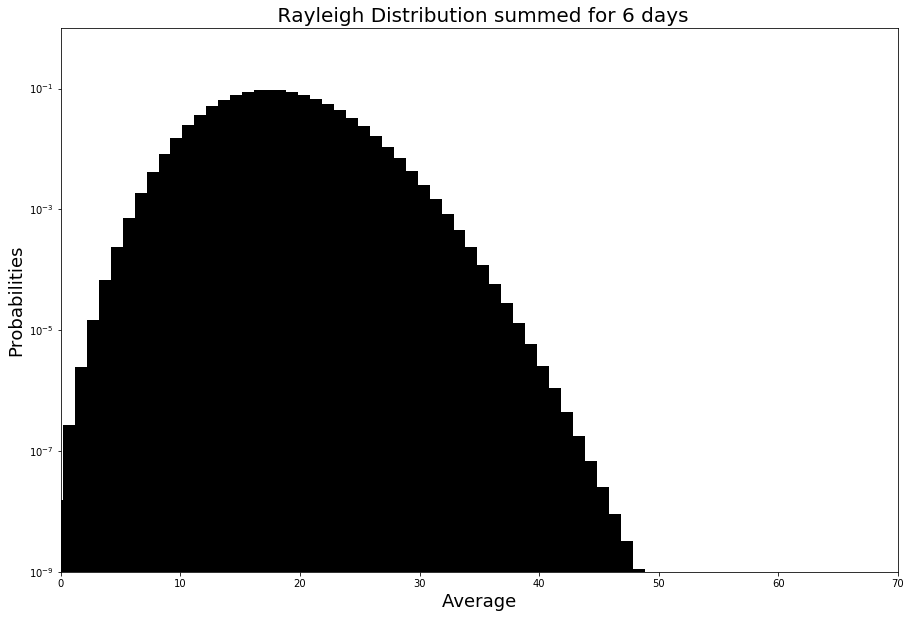

In [370]:
#B
n = 6 #days
sums = pmf
for i in range(n-1):
    sums  = scipy.signal.fftconvolve(sums, pmf)
    
plt.vlines(range(len(sums)), 0, sums, linewidth=20)
plt.xlim([0,70])
plt.ylim(1e-9, 1)
plt.yscale('log')
plt.xlabel("Average", size = 18)
plt.ylabel("Probabilities", size=18)
plt.title(" Rayleigh Distribution summed for 6 days", size =20)
plt.show()

After 5 days, the distrubition is still poisson-like due the tail-like trait to the right of the distribution. The poisson distribution tells us how many times an event (that is, a discrete event) is likely to occur within a specified period of time. Therefore, integrating for 6 days adds 6 independent variable, thus, the poisson distrubition is maintained.  Additionally, the convolution of several poisson distributions is essentially the sum of the independent random variable of the poisson distributions.

c). Next, we will show how the probability distribution evolves as we average the days. We will do this by avergaing the plot from part b. We anticipate that the plot should be more gaussian with as the days are increased. We start by plotting 10 days, then 40 days, then 100 days. <br>

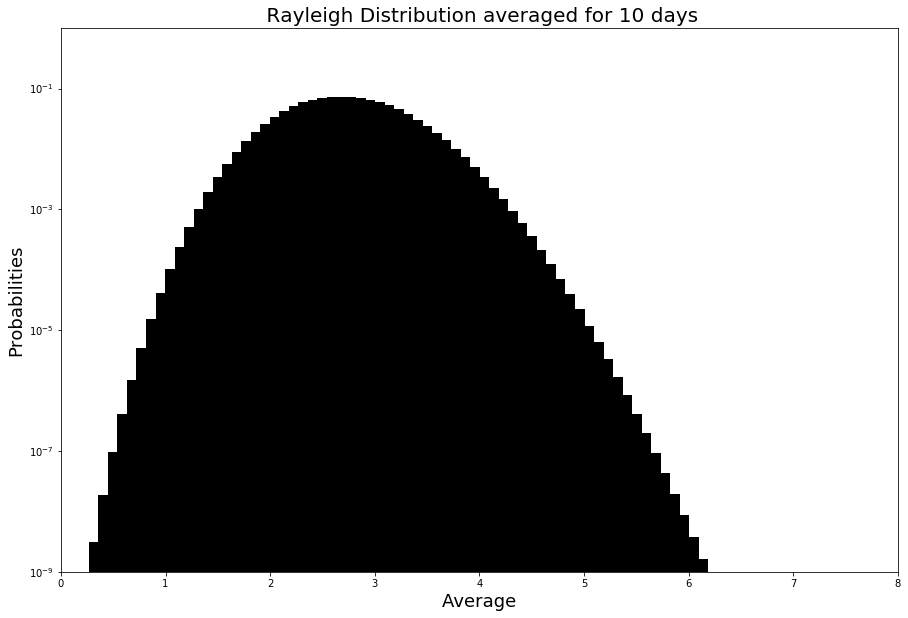

In [367]:
#C
n = 10 #days
sums = p
for i in range(n-1):
    sums  = scipy.signal.fftconvolve(sums, p)

ave = np.arange(len(sums))/ (n+1)
plt.vlines(ave, 0, sums, linewidth=20)
plt.xlim([0,8])
plt.ylim(1e-9, 1)
plt.yscale('log')
plt.xlabel("Average", size = 18)
plt.ylabel("Probabilities", size=18)
plt.title(" Rayleigh Distribution averaged for 10 days", size =20)
plt.show()

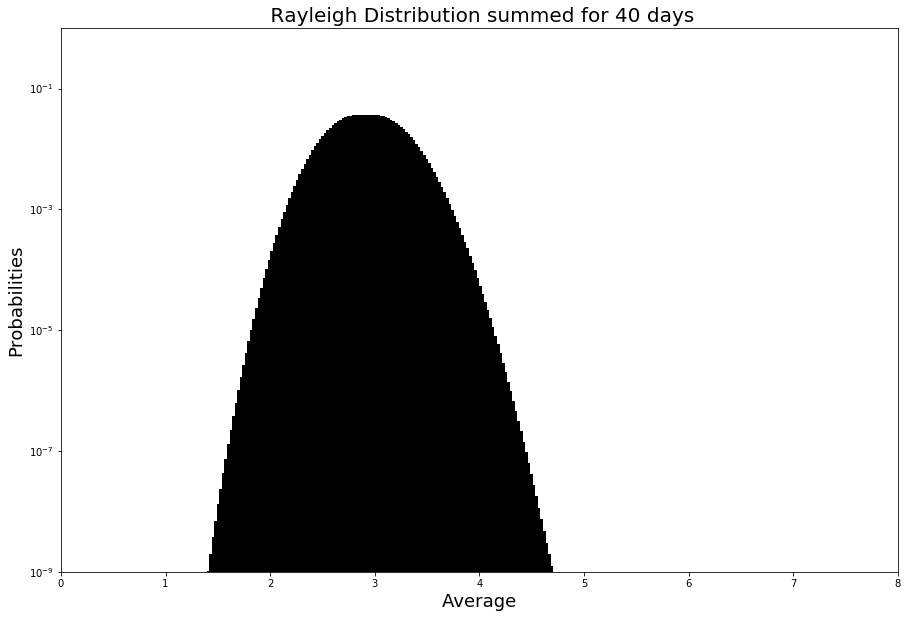

In [368]:
n = 40 #days
sums = p
for i in range(n-1):
    sums  = scipy.signal.fftconvolve(sums, p)

ave = np.arange(len(sums))/ (n+1)
plt.vlines(ave, 0, sums, linewidth=20)
plt.xlim([0,8])
plt.ylim(1e-9, 1)
plt.yscale('log')
plt.xlabel("Average", size = 18)
plt.ylabel("Probabilities", size=18)
plt.title(" Rayleigh Distribution summed for 40 days", size =20)
plt.show()

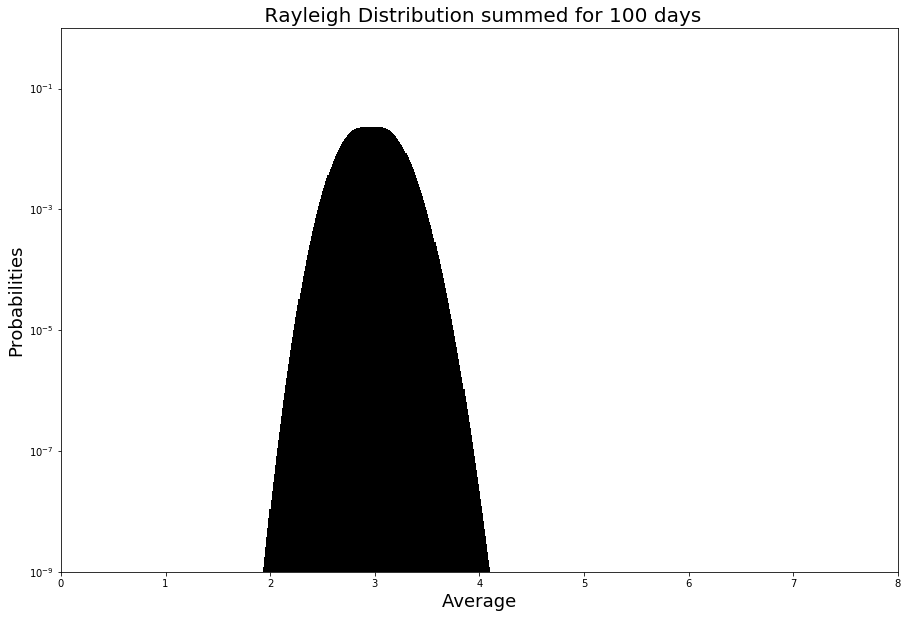

In [369]:
n = 100 #days
sums = p
for i in range(n-1):
    sums  = scipy.signal.fftconvolve(sums, p)

ave = np.arange(len(sums))/ (n+1)
plt.vlines(ave, 0, sums, linewidth=20)
plt.xlim([0,8])
plt.ylim(1e-9, 1)
plt.yscale('log')
plt.xlabel("Average", size = 18)
plt.ylabel("Probabilities", size=18)
plt.title(" Rayleigh Distribution summed for 100 days", size =20)
plt.show()

Averaging the days results in non-discrete distributions. As the number of days increases, the plots become more gaussian like, that is, upside down parabolas on a semi-log scale. The distribution narrows. This makes sense, due to increasing the averge results in greater possibilities to observe cosmic rays. The central limit theorem states that when repeating convolutions the result tends to look more like a Gaussian distribution.

d) Next, we will pick some number of days N and then assume that we saw Y*N gamma rays from our source. From this, we will determine the 'sigma' of our observation.

In [348]:
#D
N = 5
Y = 6

# Y*N = 5*6 = 30 gamma rays seen
# probability that background could have produced 30 gamma rays over 5 days
# mean 10*2.25 = 22.5
prob = stats.poisson(22.5).sf(30-1)

percent = np.around(prob *100)
sig = stats.norm.ppf(1-prob)
print("Significance: " + str(sig))

Significance: 1.4413574324556255


With the ppf function of the gaussian distrubution we are able to determine the sigma. <br>
The significance of our our observation is 1.44-sigma. 

## Problem 2
The Rayleigh distribution portrays a background with skewed continuous distribution. <br>
<br>
Rayleigh: $P(x) = \frac{x}{\sigma^2} e^{\frac{-x^2}{2\sigma^2}}$ <br> 
<br>
where the scale paramter is $\sigma$. By setting sigma to 1, let us plot the the distribution.

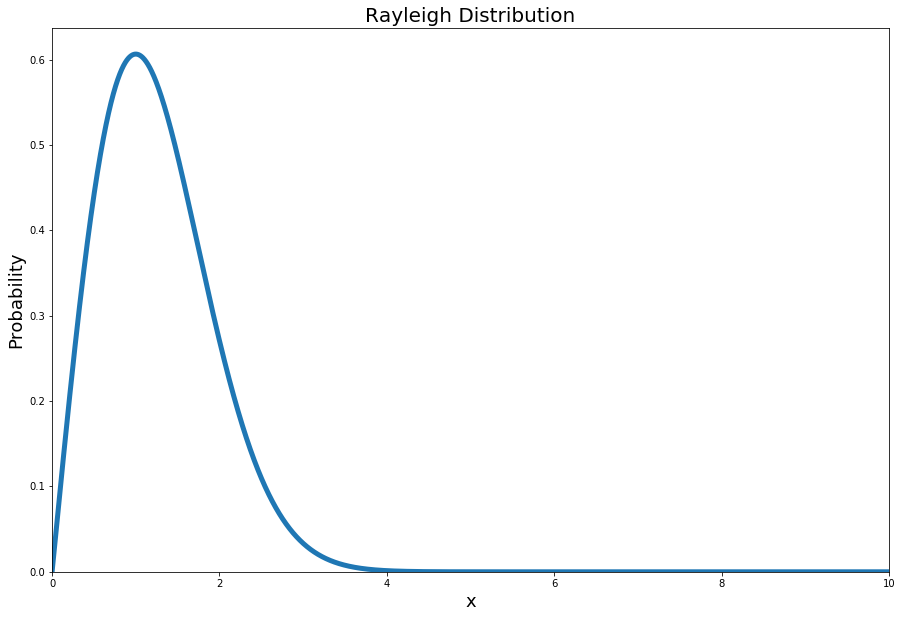

In [371]:
param = 1
d = stats.rayleigh(scale=param)
x = np.linspace(0, 10, 10000)
plt.title("Rayleigh Distribution", size =20)
plt.xlabel("x", size=18)
plt.ylabel("Probability", size=18)
plt.plot(x, d.pdf(x), linewidth=5)
plt.xlim(0, 10)
plt.ylim(0, None);

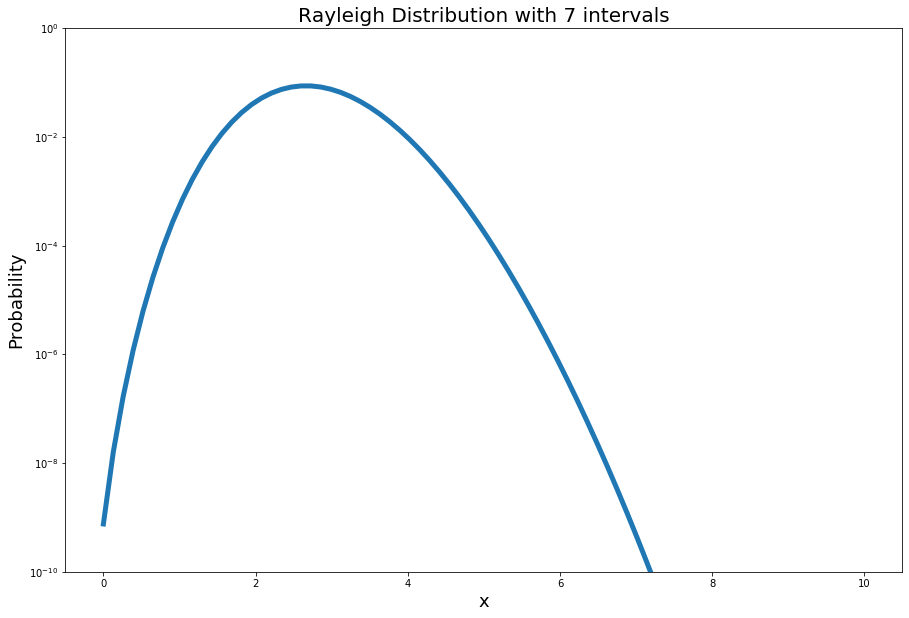

In [372]:
n = 7
sums = p
for i in range(n-1):
    sums = np.convolve(sums, p)

    
x = np.linspace(0,10, len(sums))
plt.plot(x, sums, linewidth=5)
plt.ylim(1e-10, 1);
plt.yscale('log')
plt.xlabel("x", size=18)
plt.ylabel("Probability", size=18)
plt.title("Rayleigh Distribution with 7 intervals", size =20)
plt.show()

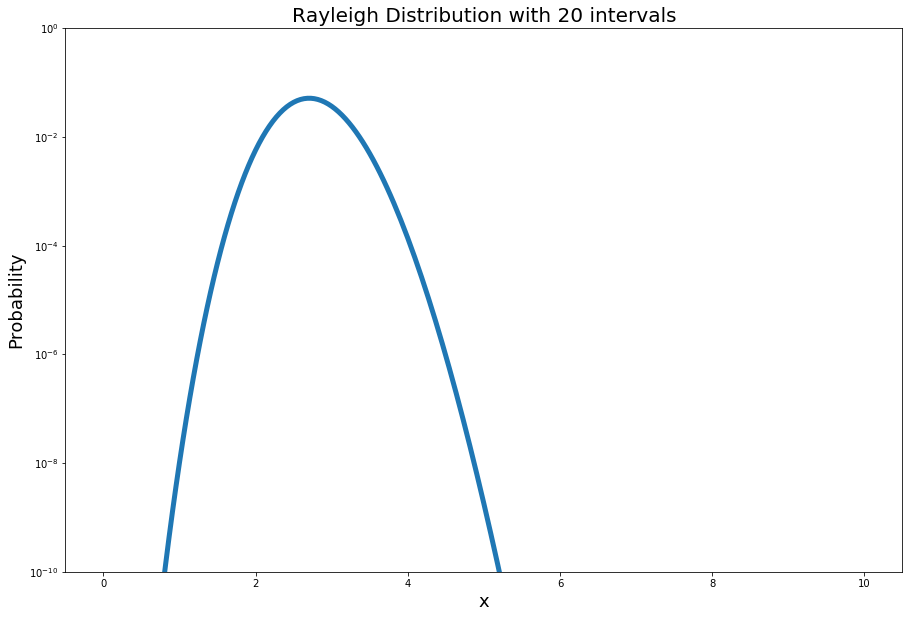

In [373]:
n = 20
sums = p
for i in range(n-1):
    sums = np.convolve(sums, p)

    
x = np.linspace(0,10, len(sums))
plt.plot(x, sums, linewidth=5)
plt.ylim(1e-10, 1);
plt.yscale('log')
plt.xlabel("x", size=18)
plt.ylabel("Probability", size=18)
plt.title("Rayleigh Distribution with 20 intervals", size =20)
plt.show()

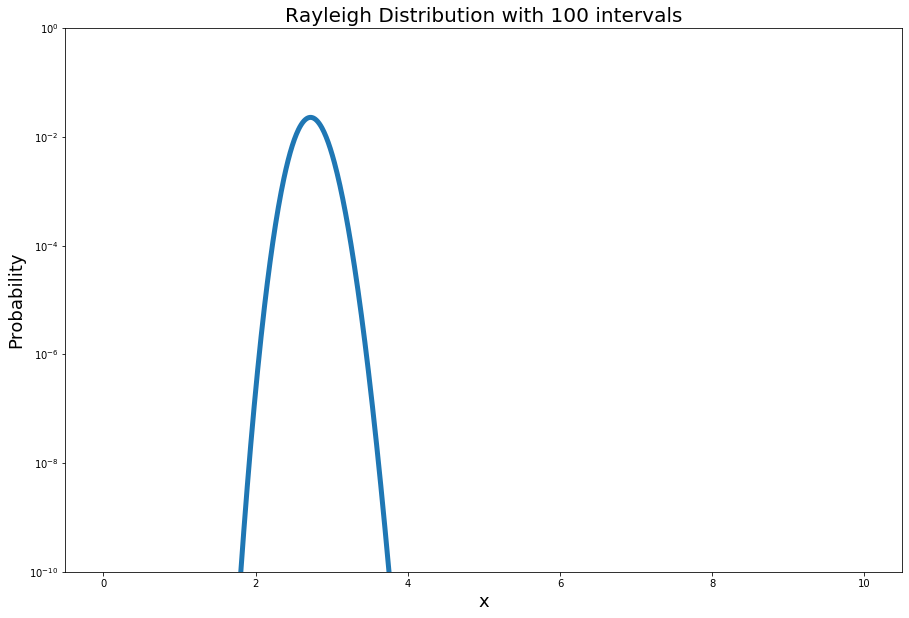

In [377]:
n = 100
sums = p
for i in range(n-1):
    sums = np.convolve(sums, p)

    
x = np.linspace(0,10, len(sums))
plt.plot(x, sums, linewidth=5)
plt.ylim(1e-10, 1);
plt.yscale('log')
plt.xlabel("x", size=18)
plt.ylabel("Probability", size=18)
plt.title("Rayleigh Distribution with 100 intervals", size =20)
plt.show()

B. As the average of the observable intervals increases the distribution resembles more of a Gaussian distribution, that is, a plot that contains a downward parabola with a semi-log scale. This happens around 100 intervals.

## Problem 3
### Version 1
In this section we will look into a single specific pixel, provided by SWIFT, to search for a signal of srength Y. The width of the gaussian distributuon is X. What is the probability/significance of detecting such signal? Can a discovery be claimed (traditionally, a 5-sigma or greater)?


In [305]:
x=1.5 #width of gaussian distribution
y=9.5 #signal strength
d1 = 1-stats.norm.cdf(y,scale = x)
s= stats.norm.ppf(1-d1)
print(d1)
print("Significane: " + str(s))

1.1996026394456294e-10
Significane: 6.333333284752001


As one can see, the significance is 6.3-sigma which is greater than 5-sigma. Thus, a discovery can be claimed. 

### Version 2
In this version, SWIFT is unable to provide an associated detection. As a result, we don't know which pixel to look at specifically, but we do know what region of the sky to observe. <br>
<br>
The question we want to look into is: What is the probability that the signal strength of 9.5 is produced with a background of 10,000 pixels? Meaning, since I am not certain which pixel to look into, I will alternatively search through 10,000 pixels. What is the probability the background procudes the signal or something more signal-like?<br>
<br> 
This is achieved by taking the product of a single pixel and scaling it by a 10k trial factor.

In [306]:
d2 = (1-stats.norm.cdf(y,scale=x))*10000
s= stats.norm.ppf(1-d2)
print(d2)
print("Significance: " +str(s))

1.1996026394456294e-06
Significance: 4.716513437997786


Due to 4.7𝜎 being less than 5𝜎, the signal is much less significant than when compared to version one. Therefore, the background was able to produce something as or more signal like than what was anticipated. 

## Problem 4
The trials factor is also known as a look-elsewhere effect. This effect is sometimes over estimated on how big of an impact this makes on sensitivity of a search. So, in this lab we will invert the problem. With the same parameters from Problem 3, we again assume a Gaussian background. Let's calculate the signal necesarry for a 5-sigma detection from both Version 1 and 2, respectively. 

In [332]:
#1 pixel
prob= 1-stats.norm.cdf(5)
sig = stats.norm.ppf(1-prob, scale=x)
print("Signal strength: " + str(sig))

Signal strength: 7.499999999955264


In [333]:
#10k pixel
sig2=stats.norm.ppf(1-prob/10000, scale=x)
print("Signal strength: " + str(sig2))

Signal strength: 9.825806230337482


In [334]:
brightnessFactor = sig2/sig
print("Brightness Factor: " + str(brightnessFactor))

Brightness Factor: 1.3101074973861455


For Version 1, a signal of ~7.5 is required and for version 2, a signal of 9.8 needed for a 5-sigma detection. Additionally, the signal must be ~1.3 times brighter for discovery when you have a trials factor of 10,000. There is only 1 in 10,000 chance to see a signal with this level of brightness, therefore, there is a much smaller probability of spotting the signal at or slightly above the sensitivity threshold. 

Now, what if we were to modify the trials factor greatly (orders of magnitude). How great is the effect on your 5-sigma sensitivity threshold? <br>
Let's set the trials factor to 10,000,000 instead of 10,000.

In [340]:
#10,000,000
a = 10e6
sig3= stats.norm.ppf(1-prob/a, scale=x)
print("Signal strength: " + str(sig3))
brightnessFactor = sig3/sig
print("Brightness Factor: " + str(brightnessFactor))

Signal strength: 11.271205709130816
Brightness Factor: 1.5028274278930729


Increasing the size of the trials factor to 10,000,000 slightly increases the brightness factor, but not by much. 